<a href="https://colab.research.google.com/github/jblanco89/MonteCarlo_Portfolio/blob/main/get_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data Processing for Montecarlo Simulation
## Coingecko API Connection

In [1]:
# Install coingecko client
# more information check: https://github.com/man-c/pycoingecko
!pip install pycoingecko

In [2]:
#Import libraries
import pandas as pd
from datetime import datetime
from pycoingecko import  CoinGeckoAPI

# var API client
cg = CoinGeckoAPI()

### Let's create a coin symbol list from coingecko

In [3]:
coin_list = cg.get_coins_list()
coin_list_df = pd.DataFrame(coin_list)
coin_list_df.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token


In [4]:
coin_list_df.shape

(9471, 3)

In [5]:
#we try how it is working
#we get coin id from 'symbol';
stock_id = coin_list_df[coin_list_df.symbol.isin(['xrp'])]
stock_id.iloc[0,0]

'binance-peg-xrp'

### Delete information about repeated ID, for instance: ADA has two ID: 'binace-peg-cardano' and 'cardano'; the second one is desired

In [6]:
unwanted_ID_list = ['binance-peg-cardano', 'binance-peg-litecoin', 'binance-peg-avalanche','binance-peg-xrp']
coin_df = coin_list_df[~coin_list_df.id.isin(unwanted_ID_list)]
coin_df.shape

(9467, 3)

In [7]:
#We try again and it works
stock_id = coin_df[coin_df.symbol.isin(['AVAX'])]
stock_id.iloc[0,0]

'avalanche-2'

In [8]:
#get id function

def get_id(symbs):
  stock_id = []
  for s in symbs:
    stock_id.append(coin_df[coin_df.symbol.isin([s])].iloc[0,0])
  return stock_id

#date time format transformation
#from normal time to UNIX format

def timetoUnix(start_date, end_date):
  date_obj_1 = datetime.strptime(start_date, '%m/%d/%y')
  date_obj_2 = datetime.strptime(end_date, '%m/%d/%y')

  range_1 = (date_obj_1 - datetime(1970,1,1)).total_seconds()
  range_2 = (date_obj_2 - datetime(1970,1,1)).total_seconds()
  return range_1, range_2




# Get stock data for analysis
### We define symbol list related our desired portfolio

In [9]:
#We get id's from symbol list defined by user
symbs = ['ltc', 'pvu', 'cake', 'ray', 'ada', 'crv', 'AVAX', 'bnb', 'cro']
id_data = get_id(symbs=symbs)


In [26]:
id_data

['litecoin',
 'plant-vs-undead-token',
 'pancakeswap-token',
 'raydium',
 'cardano',
 'curve-dao-token',
 'avalanche-2',
 'binancecoin',
 'crypto-com-chain']

In [10]:
date_1 = '08/01/21'
date_2 = '10/01/21'

t= timetoUnix(date_1,date_2)


In [11]:
#we get stock data in daily interval
data = []
for id in id_data:
  data.append(cg.get_coin_market_chart_range_by_id(id, 'usd', t[0], t[1]))



In [28]:
#Because we have a nested list of prices, it is necessary flatten it up
pr={}
for i in range(0,len(id_data)):
  pr[i] = sum(data[i]['prices'], [])

  

In [29]:
pr

{0: [1627776149019,
  145.28828035046652,
  1627779602460,
  146.5281644166786,
  1627783215749,
  147.14602932990314,
  1627786900050,
  147.83164415581132,
  1627790420533,
  150.4090160412222,
  1627794101705,
  148.39147489891133,
  1627797692566,
  148.6754223519,
  1627801305780,
  148.61353146773735,
  1627805015770,
  148.68416686392686,
  1627808488875,
  148.39182236441053,
  1627812008103,
  148.68262990958772,
  1627815690687,
  147.2932129903175,
  1627819308105,
  147.24384774545976,
  1627822923731,
  147.25142160184313,
  1627826443145,
  145.52303692301183,
  1627830130688,
  145.70507735115214,
  1627833745467,
  145.82634186245153,
  1627837264239,
  144.5296935495572,
  1627840827166,
  144.6050086742338,
  1627844410592,
  145.28402205720275,
  1627848071343,
  145.86470966554577,
  1627851716184,
  146.24940749205786,
  1627855210296,
  145.96873402783683,
  1627858913758,
  143.24909000777927,
  1627862538048,
  140.97552720134124,
  1627866097361,
  139.27167296

In [31]:
#we just need to get prices and dates which they will be stored separately
prices = []
dates = []
for coin in range(0,len(id_data)):
  for price in pr[coin][1::2]:
    prices.append(price)
  
for date in pr[0][::2]:
  date = (int(date)/1000)
  e = (datetime.utcfromtimestamp(date).strftime('%m/%d/%y'))
  dates.append(e)


In [32]:
prices

[145.28828035046652,
 146.5281644166786,
 147.14602932990314,
 147.83164415581132,
 150.4090160412222,
 148.39147489891133,
 148.6754223519,
 148.61353146773735,
 148.68416686392686,
 148.39182236441053,
 148.68262990958772,
 147.2932129903175,
 147.24384774545976,
 147.25142160184313,
 145.52303692301183,
 145.70507735115214,
 145.82634186245153,
 144.5296935495572,
 144.6050086742338,
 145.28402205720275,
 145.86470966554577,
 146.24940749205786,
 145.96873402783683,
 143.24909000777927,
 140.97552720134124,
 139.2716729659808,
 140.2721409774591,
 140.74702824774104,
 141.24992786594018,
 141.3925847984594,
 142.32781918503287,
 146.20511448559662,
 144.70194104117974,
 143.61699218842747,
 144.76215611205805,
 144.712759140531,
 143.88159305648574,
 142.95974405838365,
 143.97405499158793,
 144.1431010615374,
 144.01483853478547,
 143.69869711980968,
 143.29118645124817,
 142.92080546774073,
 141.24319590253296,
 140.20031444944513,
 141.60373851202397,
 141.69705978044155,
 141.67

In [33]:
#we need to split data by specific amount of rows (days, minutes, months, etc.)
partition = int((t[1] - t[0]) / 3600)
partition

1464

In [34]:
len(prices)

13164

In [35]:
#we define a function to split list
def slice_per(source, step):
    return [source[i::step] for i in range(step)]

In [36]:
data_pr = slice_per(prices,partition)

In [37]:
data_pr

[[145.28828035046652,
  151.6922816930291,
  15.79812455714848,
  3.2679566352803358,
  1.3482318591469278,
  1.731140636612016,
  13.212137774014078,
  339.26946584021033,
  0.12836418474736466],
 [146.5281644166786,
  152.93639579723794,
  15.760127722616305,
  3.231620138254198,
  1.3279713315811394,
  1.7406655020985613,
  13.28119718063453,
  333.83396069564327,
  0.12818700269774877],
 [147.14602932990314,
  153.4069617007635,
  15.881187261098868,
  3.228237445713487,
  1.3157334396872966,
  1.7274614048805903,
  13.337077608522458,
  335.19159244669277,
  0.12803445501058155],
 [147.83164415581132,
  13.800171363710243,
  15.826204844031766,
  3.2507713379238585,
  1.3010197221492719,
  1.6894675917787974,
  13.45650791374528,
  338.28535760521254,
  0.1277390165785442],
 [150.4090160412222,
  14.433478067549393,
  16.059815613920726,
  3.266374125446131,
  1.3074815900476404,
  1.6644369041616618,
  13.413213980086027,
  339.7682013692593,
  0.1279922457887498],
 [148.39147489

In [39]:
#I need fix this data frame

pr_df = pd.DataFrame(data_pr, columns=symbs)
pr_df

,ltc,pvu,cake,ray,ada,crv,AVAX,bnb,cro
0,145.288280,151.692282,15.798125,3.267957,1.348232,1.731141,13.212138,339.269466,0.128364
1,146.528164,152.936396,15.760128,3.231620,1.327971,1.740666,13.281197,333.833961,0.128187
2,147.146029,153.406962,15.881187,3.228237,1.315733,1.727461,13.337078,335.191592,0.128034
3,147.831644,13.800171,15.826205,3.250771,1.301020,1.689468,13.456508,338.285358,0.127739
4,150.409016,14.433478,16.059816,3.266374,1.307482,1.664437,13.413214,339.768201,0.127992
...,...,...,...,...,...,...,...,...,...
1459,152.117649,16.421392,3.410482,1.341826,1.723623,13.678442,341.033037,0.129794,NaN
1460,152.254183,16.541694,3.414522,1.338093,1.719327,13.566011,340.289108,0.130718,NaN
1461,153.010064,16.526784,3.412654,1.348061,1.702414,13.573288,340.946202,0.129544,NaN
1462,154.010597,16.213493,3.415172,1.348511,1.705091,13.599013,338.719274,0.128760,NaN


In [40]:
pr_df.shape

(1464, 9)

In [41]:
dates_df = pd.DataFrame(dates, columns=['Date'])
dates_df.tail()

,Date
1462,09/30/21
1463,09/30/21
1464,09/30/21
1465,09/30/21
1466,09/30/21


In [42]:
pr_df.shape


(1464, 9)

In [43]:
dates_df.shape

(1467, 1)

In [44]:
pr_df = pr_df.reset_index(drop=True)
dates_df = dates_df.reset_index(drop=True)

In [45]:
df_final = pd.concat([dates_df, pr_df], axis=1)
df_final

,Date,ltc,pvu,cake,ray,ada,crv,AVAX,bnb,cro
0,08/01/21,145.288280,151.692282,15.798125,3.267957,1.348232,1.731141,13.212138,339.269466,0.128364
1,08/01/21,146.528164,152.936396,15.760128,3.231620,1.327971,1.740666,13.281197,333.833961,0.128187
2,08/01/21,147.146029,153.406962,15.881187,3.228237,1.315733,1.727461,13.337078,335.191592,0.128034
3,08/01/21,147.831644,13.800171,15.826205,3.250771,1.301020,1.689468,13.456508,338.285358,0.127739
4,08/01/21,150.409016,14.433478,16.059816,3.266374,1.307482,1.664437,13.413214,339.768201,0.127992
...,...,...,...,...,...,...,...,...,...,...
1462,09/30/21,154.010597,16.213493,3.415172,1.348511,1.705091,13.599013,338.719274,0.128760,NaN
1463,09/30/21,151.969487,15.942648,3.391920,1.352620,1.723675,13.256720,339.540742,0.129421,NaN
1464,09/30/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,09/30/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
import matplotlib.pyplot as plt


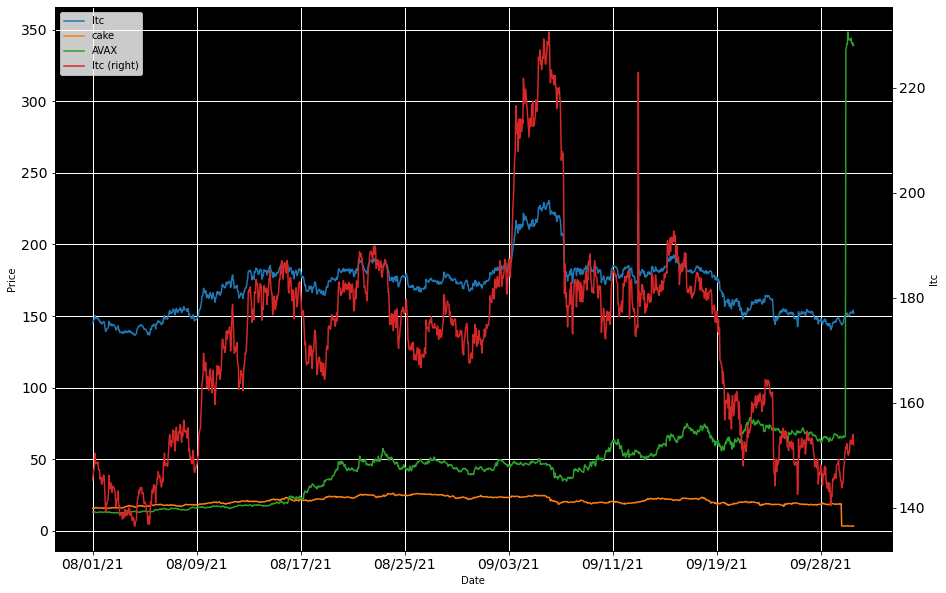

In [47]:
ax = df_final.plot(x='Date', y=['ltc', 'cake', 'AVAX'], figsize=(15,10))
ax2 = df_final.plot(x='Date', y='ltc',secondary_y=True, ax=ax)
ax.grid(False, color='w', linestyle='-', linewidth=1)
ax.set_facecolor('0')
ax.set_ylabel('Price')
ax2.set_ylabel('ltc')
ax.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
plt.show()